In [5]:
import numpy as np
import tensorly as tl
import matplotlib.pyplot as plt

In [6]:
A = [[1, 2, 3], [4, 5, 6]] #Zeile für Zeile
B = [[7, 8, 9], [10, 11, 12]]

In [7]:
A = np.arange(6).reshape((2,3))+1 #arrange(Anz. Werte in A), reshape(Zeilen, Spalten), +'1.Input'
A

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
B = np.arange(6).reshape((2,3))+7 #arrange(Anz. Werte in B), reshape(Zeilen, Spalten), +'1.Input'
B

array([[ 7,  8,  9],
       [10, 11, 12]])

In [9]:
tl.tenalg.kronecker((A,B))

array([[ 7,  8,  9, 14, 16, 18, 21, 24, 27],
       [10, 11, 12, 20, 22, 24, 30, 33, 36],
       [28, 32, 36, 35, 40, 45, 42, 48, 54],
       [40, 44, 48, 50, 55, 60, 60, 66, 72]])

In [10]:
tl.tenalg.khatri_rao((A,B))

array([[ 7, 16, 27],
       [10, 22, 36],
       [28, 40, 54],
       [40, 55, 72]])

In [11]:
A*B

array([[ 7, 16, 27],
       [40, 55, 72]])

In [12]:
#Tensoren erstellen von Zahl 1-50, 5,2,5 Grösse
X = np.arange(50).reshape((5,2,5))+1 #+1 da bei 0 anfängt zu Zählen
X

array([[[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]],

       [[11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]],

       [[21, 22, 23, 24, 25],
        [26, 27, 28, 29, 30]],

       [[31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40]],

       [[41, 42, 43, 44, 45],
        [46, 47, 48, 49, 50]]])

In [13]:
tl.unfold(X,0) #0.Mode Tensor

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]])

In [14]:
tl.unfold(X,1)  #1.Mode Tensor

array([[ 1,  2,  3,  4,  5, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 31,
        32, 33, 34, 35, 41, 42, 43, 44, 45],
       [ 6,  7,  8,  9, 10, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 36,
        37, 38, 39, 40, 46, 47, 48, 49, 50]])

In [15]:
tl.unfold(X,2)  #2.Mode Tensor

array([[ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46],
       [ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47],
       [ 3,  8, 13, 18, 23, 28, 33, 38, 43, 48],
       [ 4,  9, 14, 19, 24, 29, 34, 39, 44, 49],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]])

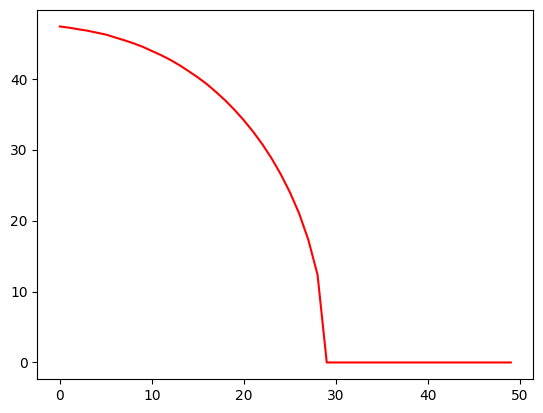

In [16]:
#3-Mode Tensor mit Zufallszahlen, Grösse 30x30x30
X = np.random.rand(30,30,30)

from tensorly.decomposition import tucker
err = [] #für Grafik
for r in range(1,51):
  G, fac = tucker(X, (r, r, r))
  X_rec = tl.tucker_to_tensor((G, fac))
  err.append(tl.norm(X - X_rec)) #für Grafik
plt.plot(err, 'r-')
plt.show()